[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW7.ipynb)

**Problem 1**: Consider the data set on bike share counts in Seoul Korea. You can read in the data using



bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")

Counts is the number of bicycles rented during the lunch hour each day. The continuous predictors are Temperature, Humidity, Wind_speed, Visibility and Rainfall. Seasons is a categorical variable with multiple levels and Holiday is a categorical variable with two levels.

Part a. Split the data into a training and test set.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [6]:
bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")
bikes.head()

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
0,449,1.7,23,1.4,2000,0.0,Winter,No Holiday
1,479,4.3,41,1.3,1666,0.0,Winter,No Holiday
2,333,5.8,85,1.7,349,0.0,Winter,No Holiday
3,393,-0.3,38,4.8,1823,0.0,Winter,No Holiday
4,321,-2.3,25,0.0,1962,0.0,Winter,No Holiday


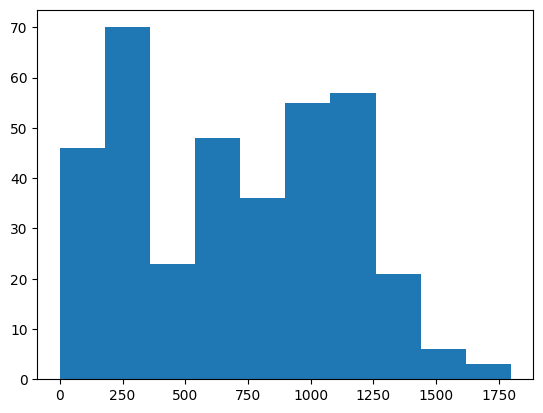

In [7]:
plt.hist(bikes.Count)
plt.show()

In [9]:
X = bikes[["Temperature", "Humidity", "Wind_speed", "Visibility", "Rainfall", "Seasons", "Holiday"]]
y = bikes["Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

Part b.  Build a linear regression model for the training data using all the predictors in the model with Count as the target variable.  Remove all predictors from the model with a P-Value greater than 0.05. What predictors are left?

In [16]:
X_train_int = X_train.astype(int)
X_train_sm = sm.add_constant(X_train_int)

model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

ValueError: invalid literal for int() with base 10: 'Winter'

Part c. Instead of removing all predictors with a P-Value greater than 0.05, remove the largest P-Value and refit, the repeat that process until all the predictors that remain are significant (have P-Values greater than 0.05). What predictors are left in the model?

In [12]:
formula = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons)"
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.79e-43
Time:                        05:07:32   Log-Likelihood:                -1783.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     246   BIC:                             3617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1064.6941    119.001      8.947      0.000     830.304    1299.084
C(Seasons)[T.Spring]    33.9579     49.661      0.684      0.495     -63.857     131.773
C(Seasons)[T.Summer]  -174.2382     63.383     -2.749      0.006    -299.080     -49.396
C(Seasons)[T.Winter]  -393.2019     73.523     -5.348      0.000    -538.018    -248.386
Temperature             16.0355      3.260      4.919      0.000       9.614      22.457
Humidity                -8.1375      1.189     -6.843      0.000     -10.480      -5.795
Wind_speed              14.1514     18.336      0.772      0.441     -21.965      50.268
Visibility              -0.0742      0.038     -1.955      0.052      -0.149       0.001
Rainfall               -59.3320     21.015     -2.823      0.005    -100.724     -17.940
==============================================================================
Omnibus:                       21.096   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.636
Skew:                          -0.394   Prob(JB):                     1.23e-10
Kurtosis:                       4.917   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
formula = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons, Treatment('Spring'))"
full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.79e-43
Time:                        05:08:35   Log-Likelihood:                -1783.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     246   BIC:                             3617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1098.6520    116.500      9.431      0.000     869.188    1328.116
C(Seasons, Treatment('Spring'))[T.Autumn]   -33.9579     49.661     -0.684      0.495    -131.773      63.857
C(Seasons, Treatment('Spring'))[T.Summer]  -208.1961     63.907     -3.258      0.001    -334.071     -82.321
C(Seasons, Treatment('Spring'))[T.Winter]  -427.1598     73.650     -5.800      0.000    -572.226    -282.094
Temperature                                  16.0355      3.260      4.919      0.000       9.614      22.457
Humidity                                     -8.1375      1.189     -6.843      0.000     -10.480      -5.795
Wind_speed                                   14.1514     18.336      0.772      0.441     -21.965      50.268
Visibility                                   -0.0742      0.038     -1.955      0.052      -0.149       0.001
Rainfall                                    -59.3320     21.015     -2.823      0.005    -100.724     -17.940
==============================================================================
Omnibus:                       21.096   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.636
Skew:                          -0.394   Prob(JB):                     1.23e-10
Kurtosis:                       4.917   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
formula = "Count ~ Temperature + Humidity + Wind_speed + Visibility + Rainfall + C(Seasons, Treatment('Spring'))"


full_model = smf.ols(formula=formula, data=bikes.loc[y_train.index]).fit()

full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.79e-43
Time:                        05:12:15   Log-Likelihood:                -1783.7
No. Observations:                 255   AIC:                             3585.
Df Residuals:                     246   BIC:                             3617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1098.6520    116.500      9.431      0.000     869.188    1328.116
C(Seasons, Treatment('Spring'))[T.Autumn]   -33.9579     49.661     -0.684      0.495    -131.773      63.857
C(Seasons, Treatment('Spring'))[T.Summer]  -208.1961     63.907     -3.258      0.001    -334.071     -82.321
C(Seasons, Treatment('Spring'))[T.Winter]  -427.1598     73.650     -5.800      0.000    -572.226    -282.094
Temperature                                  16.0355      3.260      4.919      0.000       9.614      22.457
Humidity                                     -8.1375      1.189     -6.843      0.000     -10.480      -5.795
Wind_speed                                   14.1514     18.336      0.772      0.441     -21.965      50.268
Visibility                                   -0.0742      0.038     -1.955      0.052      -0.149       0.001
Rainfall                                    -59.3320     21.015     -2.823      0.005    -100.724     -17.940
==============================================================================
Omnibus:                       21.096   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.636
Skew:                          -0.394   Prob(JB):                     1.23e-10
Kurtosis:                       4.917   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Part d. Regardless of whether or not you got the same set of predictors in problems 1 and 2, the two approaches can potentially give different results. Explain why.

Part e. Find the out of sample MSE for both the model with all predictors, the model with all variables with p values above 0.05 removed, and the model with variables removed 1 at a time. which model is best?

**Problem 2** Use the same data as above and the same train-test split. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.  

Part a. Build a regression tree with a maximum depth of 2. Find the out of sample MSE.

Part b. Increase the depth to 3, 4, 5, and 6. Check the out of sample MSE for each and report them.

Part c. Based on the out of sample MSE, which depth is best?

**Problem 3** Explain why using out of sample metrics is important for finding the best model as opposed to using in sample metrics. Out of all the models, both regression tree and linear regression models, which is the best model using out-of-sample MSE.

**Problem 4**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Split this data into a training set and a test set.

Part b. Fit a linear regression model on the training set. Report the p-values for each variable.

Part c. Interpret the p-value for AdSpend in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

Part d. Interpret the p-value for DiscountRate in the context of the problem. What does the value of that p-value imply for the relationship between these variables.

**Problem 5** Using the same data as problem 4.

Part a. Build three regression tree models on the training data set with a max depths of 2, 3, and 5.

Part b. Find the in sample and out of sample R^2 for all three models. (you shouold have 6 R^2 in total).

Part c. Use these R^2 values in terms of detecting to detect any underfitting or overfitting in the models.